# Tutorial 

Let us consider chapter 7 of the excellent treatise on the subject of Exponential Smoothing By Hyndman and Athanasopoulos [1].
We will work through all the examples in the chapter as they unfold.

[1] [Hyndman, Rob J., and George Athanasopoulos. Forecasting: principles and practice. OTexts, 2014.](https://www.otexts.org/fpp/7)

# Exponential smoothing

First we load some data. We have included the R data in the notebook for expedience.

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

data = [446.6565,  454.4733,  455.663 ,  423.6322,  456.2713,  440.5881, 425.3325,  485.1494,  506.0482,  526.792 ,  514.2689,  494.211 ]
index= ['1996-12-31 00:00:00', '1997-12-31 00:00:00', '1998-12-31 00:00:00', '1999-12-31 00:00:00', '2000-12-31 00:00:00', '2001-12-31 00:00:00', '2002-12-31 00:00:00', '2003-12-31 00:00:00', '2004-12-31 00:00:00', '2005-12-31 00:00:00', '2006-12-31 00:00:00', '2007-12-31 00:00:00']
oildata = pd.Series(data, index)
oildata.index = pd.DatetimeIndex(oildata.index, freq=pd.infer_freq(oildata.index))

data = [17.5534,  21.86  ,  23.8866,  26.9293,  26.8885,  28.8314, 30.0751,  30.9535,  30.1857,  31.5797,  32.5776,  33.4774, 39.0216,  41.3864,  41.5966]
index= ['1990-12-31 00:00:00', '1991-12-31 00:00:00', '1992-12-31 00:00:00', '1993-12-31 00:00:00', '1994-12-31 00:00:00', '1995-12-31 00:00:00', '1996-12-31 00:00:00', '1997-12-31 00:00:00', '1998-12-31 00:00:00', '1999-12-31 00:00:00', '2000-12-31 00:00:00', '2001-12-31 00:00:00', '2002-12-31 00:00:00', '2003-12-31 00:00:00', '2004-12-31 00:00:00']
air = pd.Series(data, index)
air.index = pd.DatetimeIndex(air.index, freq=pd.infer_freq(air.index))

data = [263.9177,  268.3072,  260.6626,  266.6394,  277.5158,  283.834 , 290.309 ,  292.4742,  300.8307,  309.2867,  318.3311,  329.3724, 338.884 ,  339.2441,  328.6006,  314.2554,  314.4597,  321.4138, 329.7893,  346.3852,  352.2979,  348.3705,  417.5629,  417.1236, 417.7495,  412.2339,  411.9468,  394.6971,  401.4993,  408.2705, 414.2428]
index= ['1970-12-31 00:00:00', '1971-12-31 00:00:00', '1972-12-31 00:00:00', '1973-12-31 00:00:00', '1974-12-31 00:00:00', '1975-12-31 00:00:00', '1976-12-31 00:00:00', '1977-12-31 00:00:00', '1978-12-31 00:00:00', '1979-12-31 00:00:00', '1980-12-31 00:00:00', '1981-12-31 00:00:00', '1982-12-31 00:00:00', '1983-12-31 00:00:00', '1984-12-31 00:00:00', '1985-12-31 00:00:00', '1986-12-31 00:00:00', '1987-12-31 00:00:00', '1988-12-31 00:00:00', '1989-12-31 00:00:00', '1990-12-31 00:00:00', '1991-12-31 00:00:00', '1992-12-31 00:00:00', '1993-12-31 00:00:00', '1994-12-31 00:00:00', '1995-12-31 00:00:00', '1996-12-31 00:00:00', '1997-12-31 00:00:00', '1998-12-31 00:00:00', '1999-12-31 00:00:00', '2000-12-31 00:00:00']
livestock2 = pd.Series(data, index)
livestock2.index = pd.DatetimeIndex(livestock2.index, freq=pd.infer_freq(livestock2.index))

data = [407.9979 ,  403.4608,  413.8249,  428.105 ,  445.3387,  452.9942, 455.7402]
index= ['2001-12-31T00:00:00.000000000', '2002-12-31T00:00:00.000000000', '2003-12-31T00:00:00.000000000', '2004-12-31T00:00:00.000000000', '2005-12-31T00:00:00.000000000', '2006-12-31T00:00:00.000000000', '2007-12-31T00:00:00.000000000']
livestock3 = pd.Series(data, index)
livestock3.index = pd.DatetimeIndex(livestock3.index, freq=pd.infer_freq(livestock3.index))

data = [41.7275,  24.0418,  32.3281,  37.3287,  46.2132,  29.3463, 36.4829,  42.9777,  48.9015,  31.1802,  37.7179,  40.4202, 51.2069,  31.8872,  40.9783,  43.7725,  55.5586,  33.8509, 42.0764,  45.6423,  59.7668,  35.1919,  44.3197,  47.9137]
index= ['2005-01-01 00:00:00', '2005-04-01 00:00:00', '2005-07-01 00:00:00', '2005-10-01 00:00:00', '2006-01-01 00:00:00', '2006-04-01 00:00:00', '2006-07-01 00:00:00', '2006-10-01 00:00:00', '2007-01-01 00:00:00', '2007-04-01 00:00:00', '2007-07-01 00:00:00', '2007-10-01 00:00:00', '2008-01-01 00:00:00', '2008-04-01 00:00:00', '2008-07-01 00:00:00', '2008-10-01 00:00:00', '2009-01-01 00:00:00', '2009-04-01 00:00:00', '2009-07-01 00:00:00', '2009-10-01 00:00:00', '2010-01-01 00:00:00', '2010-04-01 00:00:00', '2010-07-01 00:00:00', '2010-10-01 00:00:00']
aust = pd.Series(data, index)
aust.index = pd.DatetimeIndex(aust.index, freq=pd.infer_freq(aust.index))

## Simple Exponential Smoothing
Lets use Simple Exponential Smoothing to forecast the below oil data.

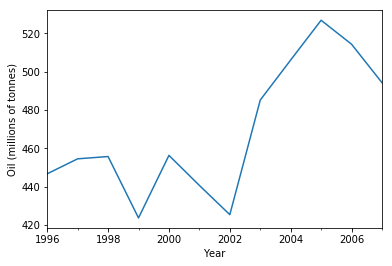

Figure 7.1: Oil production in Saudi Arabia from 1996 to 2007.


In [2]:
ax=oildata.plot()
ax.set_xlabel("Year")
ax.set_ylabel("Oil (millions of tonnes)")
plt.show()
print("Figure 7.1: Oil production in Saudi Arabia from 1996 to 2007.")

Here we run three variants of simple exponential smoothing:
1. In ```fit1``` we do not use the auto optimization but instead choose to explicitly provide the model with the $\alpha=0.2$ parameter
2. In ```fit2``` as above we choose an $\alpha=0.6$
3. In ```fit3``` we allow statsmodels to automatically find an optimized $\alpha$ value for us. This is the recommended approach.

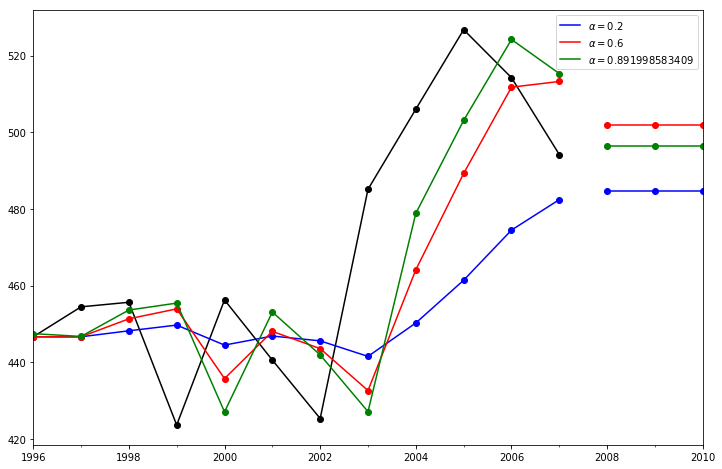

In [3]:
fit1 = SimpleExpSmoothing(oildata).fit(alpha=0.2,optimized=False)
fcast1 = fit1.forecast(3).rename(r'$\alpha=0.2$')
fit2 = SimpleExpSmoothing(oildata).fit(alpha=0.6,optimized=False)
fcast2 = fit2.forecast(3).rename(r'$\alpha=0.6$')
fit3 = SimpleExpSmoothing(oildata).fit()
fcast3 = fit3.forecast(3).rename(r'$\alpha=%s$'%fit3.model.params['alpha'])

ax = oildata.plot(marker='o', color='black', figsize=(12,8))
fcast1.plot(marker='o', ax=ax, color='blue', legend=True)
fit1.fittedvalues.plot(marker='o', ax=ax, color='blue')
fcast2.plot(marker='o', ax=ax, color='red', legend=True)

fit2.fittedvalues.plot(marker='o', ax=ax, color='red')
fcast3.plot(marker='o', ax=ax, color='green', legend=True)
fit3.fittedvalues.plot(marker='o', ax=ax, color='green')
plt.show()

## Holt's Method

Lets take a look at another example.
This time we use air pollution data and the Holt's Method.
We will fit three examples again.
1. In ```fit1``` we again choose not to use the optimzer and provide explicit values for $\alpha=0.8$ and $\beta=0.2$
2. In ```fit2``` we do the same as in ```fit1``` but choose to use an exponential model rather than a Holt's additive model.
3. In ```fit3``` we used a damped versions of the Holt's additive model but allow the dampening parameter $\phi$ to be optimized while fixing the values for $\alpha=0.8$ and $\beta=0.2$

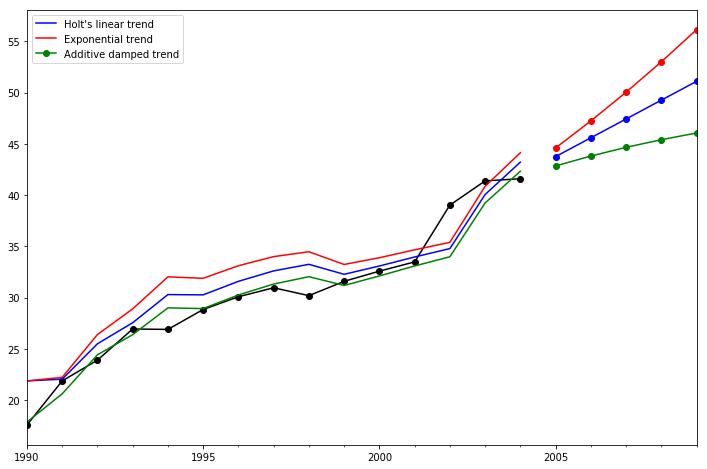

In [4]:
fit1 = Holt(air).fit(alpha=0.8, beta=0.2, optimized=False)
fcast1 = fit1.forecast(5).rename("Holt's linear trend")
fit2 = Holt(air, exponential=True).fit(alpha=0.8, beta=0.2, optimized=False)
fcast2 = fit2.forecast(5).rename("Exponential trend")
fit3 = Holt(air, damped=True).fit(alpha=0.8, beta=0.2)
fcast3 = fit3.forecast(5).rename("Additive damped trend")

ax = air.plot(color="black", marker="o", figsize=(12,8))
fit1.fittedvalues.plot(ax=ax, color='blue')
fcast1.plot(ax=ax, color='blue', marker="o", legend=True)
fit2.fittedvalues.plot(ax=ax, color='red')
fcast2.plot(ax=ax, color='red', marker="o", legend=True)
fit3.fittedvalues.plot(ax=ax, color='green')
fcast3.plot(ax=ax, color='green', marker="o", legend=True)

plt.show()

### Seasonally adjusted data
Lets look at some seasonally adjusted livestock data. We fit five Holt's models.
The below table allows us to compare results when we use exponential versus additive and damped versus non-damped.
 
Note: ```fit4``` does not allow the parameter $\phi$ to be otpimized by providing a fixed value of $\phi=0.98$

In [5]:
fit1 = SimpleExpSmoothing(livestock2).fit()
fit2 = Holt(livestock2).fit()
fit3 = Holt(livestock2,exponential=True).fit()
fit4 = Holt(livestock2,damped=True).fit(phi=0.98)
fit5 = Holt(livestock2,exponential=True,damped=True).fit()

results=pd.DataFrame(index=[r"$\alpha$",r"$\beta$",r"$\phi$",r"$l_0$","$b_0$","SSE"] ,columns=['SES', "Holt's","Exponential", "Additive", "Multiplicative"])
results["SES"] =            [fit1.params[p] for p in ['alpha', 'beta', 'phi', 'l0', 'b0']] + [fit1.SSE]
results["Holt's"] =         [fit2.params[p] for p in ['alpha', 'beta', 'phi', 'l0', 'b0']] + [fit2.SSE]
results["Exponential"] =    [fit3.params[p] for p in ['alpha', 'beta', 'phi', 'l0', 'b0']] + [fit3.SSE]
results["Additive"] =       [fit4.params[p] for p in ['alpha', 'beta', 'phi', 'l0', 'b0']] + [fit4.SSE]
results["Multiplicative"] = [fit5.params[p] for p in ['alpha', 'beta', 'phi', 'l0', 'b0']] + [fit5.SSE]
results

,SES,Holt's,Exponential,Additive,Multiplicative
$\alpha$,1.000000,0.974306,0.977633,0.978848,0.974911
$\beta$,0.050000,0.000000,0.000000,0.000000,0.000000
$\phi$,NaN,NaN,NaN,0.980000,0.981646
$l_0$,263.917700,258.882609,260.341529,257.357666,258.951806
$b_0$,NaN,5.010774,1.013780,6.644536,1.019451
SSE,6761.350218,6004.138200,6104.194746,6036.555004,6081.995045


### Plots of Seasonally Adjusted Data
The following plots allow us to evaluate the level and slope/trend components of the above table's fits.

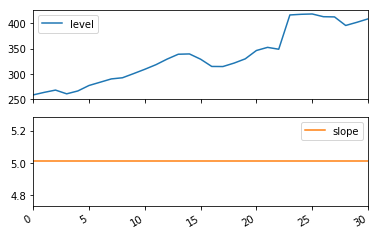

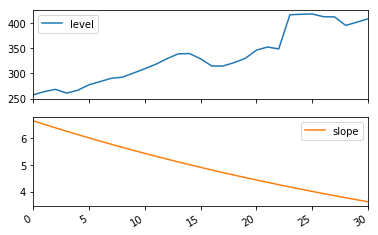

Figure 7.4: Level and slope components for Holt’s linear trend method and the additive damped trend method.


In [6]:
for fit in [fit2,fit4]:
    pd.DataFrame(np.c_[fit.level,fit.slope]).rename(columns={0:'level',1:'slope'}).plot(subplots=True)
plt.show()
print('Figure 7.4: Level and slope components for Holt’s linear trend method and the additive damped trend method.')

## Comparison
Here we plot a comparison Simple Exponential Smoothing and Holt's Methods for various additive, exponential and damped combinations. All of the models parameters will be optimized by statsmodels.

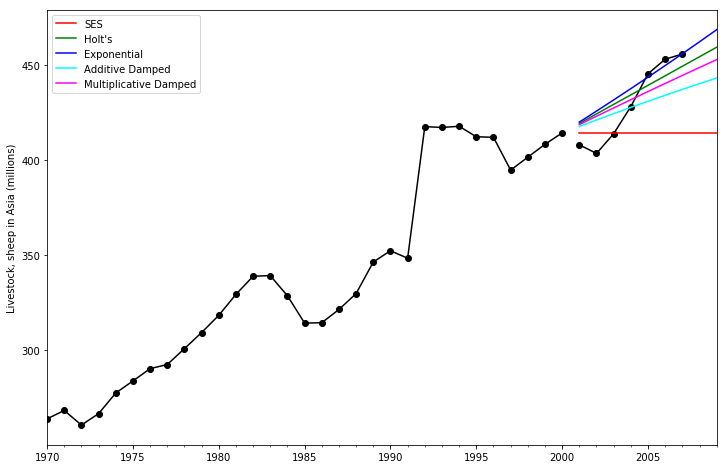

Figure 7.5: Forecasting livestock, sheep in Asia: comparing forecasting performance of non-seasonal methods.


In [7]:
fit1 = SimpleExpSmoothing(livestock2).fit()
fcast1 = fit1.forecast(9).rename("SES")
fit2 = Holt(livestock2).fit()
fcast2 = fit2.forecast(9).rename("Holt's")
fit3 = Holt(livestock2, exponential=True).fit()
fcast3 = fit3.forecast(9).rename("Exponential")
fit4 = Holt(livestock2, damped=True).fit(phi=0.98)
fcast4 = fit4.forecast(9).rename("Additive Damped")
fit5 = Holt(livestock2, exponential=True, damped=True).fit()
fcast5 = fit5.forecast(9).rename("Multiplicative Damped")

ax = livestock2.plot(color="black", marker="o", figsize=(12,8))
livestock3.plot(ax=ax, color="black", marker="o", legend=False)
fcast1.plot(ax=ax, color='red', legend=True)
fcast2.plot(ax=ax, color='green', legend=True)
fcast3.plot(ax=ax, color='blue', legend=True)
fcast4.plot(ax=ax, color='cyan', legend=True)
fcast5.plot(ax=ax, color='magenta', legend=True)
ax.set_ylabel('Livestock, sheep in Asia (millions)')
plt.show()
print('Figure 7.5: Forecasting livestock, sheep in Asia: comparing forecasting performance of non-seasonal methods.')

## Holt's Winters Seasonal
Finally we are able to run full Holt's Winters Seasonal Exponential Smoothing  including a trend component and a seasonal component.
Statsmodels allows for all the combinations including as shown in the examples below:
1. ```fit1``` additive trend, additive seasonal of period ```m=4``` and the use of a Boxcox transformation.
1. ```fit2``` additive trend, multiplicative seasonal of period ```m=4``` and the use of a Boxcox transformation..
1. ```fit3``` additive damped trend, additive seasonal of period ```m=4``` and the use of a boxcox transformation.
1. ```fit4``` additive damped trend, multiplicative seasonal of period ```m=4``` and the use of a boxcox transformation.

The plot shows the results and forecast for ```fit1``` and ```fit2```.
The table allows us to compare the results and parameterizations.

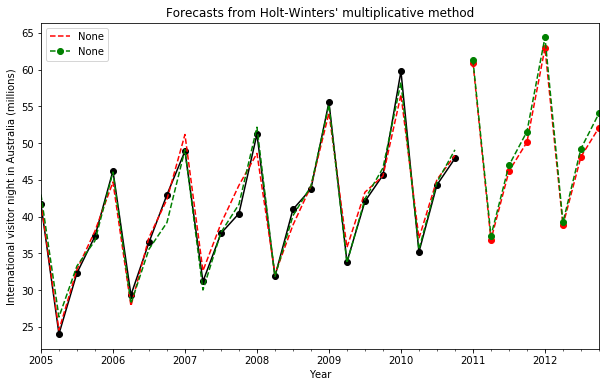

Figure 7.6: Forecasting international visitor nights in Australia using Holt-Winters method with both additive and multiplicative seasonality.


,Additive,Multiplicative,Additive Dam,Multiplica Dam
$\alpha$,0.421053,1.716709e-08,0.368421,2.347892e-13
$\beta$,0.246942,1.839167e-12,0.046726,4.168580e-21
$\phi$,NaN,NaN,0.841069,9.657436e-01
$\gamma$,0.578947,2.015606e-08,0.631579,6.796117e-17
$l_0$,49.143104,5.056859e+01,49.383297,5.055410e+01
$b_0$,1.030709,9.129325e-01,1.087215,1.450792e+00
SSE,63.625584,3.459371e+01,68.386440,3.017981e+01


In [8]:
fit1 = ExponentialSmoothing(aust, m=4, trend='add', seasonal='add', use_boxcox=True).fit()
fit2 = ExponentialSmoothing(aust, m=4, trend='add', seasonal='mul', use_boxcox=True).fit()
fit3 = ExponentialSmoothing(aust, m=4, trend='add', seasonal='add', damped=True, use_boxcox=True).fit()
fit4 = ExponentialSmoothing(aust, m=4, trend='add', seasonal='mul', damped=True, use_boxcox=True).fit()
results=pd.DataFrame(index=[r"$\alpha$",r"$\beta$",r"$\phi$",r"$\gamma$",r"$l_0$","$b_0$","SSE"])
results["Additive"]       = [fit1.params[p] for p in ['alpha', 'beta', 'phi', 'gamma', 'l0', 'b0']] + [fit1.SSE]
results["Multiplicative"] = [fit2.params[p] for p in ['alpha', 'beta', 'phi', 'gamma', 'l0', 'b0']] + [fit2.SSE]
results["Additive Dam"]   = [fit3.params[p] for p in ['alpha', 'beta', 'phi', 'gamma', 'l0', 'b0']] + [fit3.SSE]
results["Multiplica Dam"] = [fit4.params[p] for p in ['alpha', 'beta', 'phi', 'gamma', 'l0', 'b0']] + [fit4.SSE]

ax = aust.plot(figsize=(10,6), marker='o', color='black', title="Forecasts from Holt-Winters' multiplicative method" )
ax.set_ylabel("International visitor night in Australia (millions)")
ax.set_xlabel("Year")
fit1.fittedvalues.plot(ax=ax, style='--', color='red')
fit2.fittedvalues.plot(ax=ax, style='--', color='green')

fit1.forecast(8).plot(ax=ax, style='--', marker='o', color='red', legend=True)
fit2.forecast(8).plot(ax=ax, style='--', marker='o', color='green', legend=True)

plt.show()
print("Figure 7.6: Forecasting international visitor nights in Australia using Holt-Winters method with both additive and multiplicative seasonality.")

results

### The Internals
It is possible to get at the internals of the Exponential Smoothing models. 

Here we show some tables that allow you to view side by side the original values $y_t$, the level $l_t$, the trend $b_t$, the season $s_t$ and the fitted values $\hat{y}_t$.

In [9]:
pd.DataFrame(np.c_[aust, fit1.level, fit1.slope, fit1.season, fit1.fittedvalues], 
columns=[r'$y_t$',r'$l_t$',r'$b_t$',r'$s_t$',r'$\hat{y}_t$'],index=aust.index). \
append(fit1.forecast(8).rename(r'$\hat{y}_t$').to_frame())

,$\hat{y}_t$,$b_t$,$l_t$,$s_t$,$y_t$
2005-01-01,41.945938,1.030709,49.143104,-8.354339,41.7275
2005-04-01,24.571444,1.007997,50.081839,-26.825029,24.0418
2005-07-01,32.805768,0.952927,50.866829,-19.290533,32.3281
2005-10-01,38.039260,0.903261,51.618633,-14.894011,37.3287
2006-01-01,44.697752,0.829381,52.222711,-7.476975,46.2132
2006-04-01,27.852096,0.986950,53.690175,-25.959964,29.3463
2006-07-01,37.158042,1.142311,55.306263,-19.681404,36.4829
2006-10-01,42.342406,1.072113,56.164304,-14.526209,42.9777
2007-01-01,51.165102,1.138168,57.503909,-8.787481,48.9015
2007-04-01,32.631826,0.902808,57.688981,-26.800379,31.1802


In [10]:
pd.DataFrame(np.c_[aust, fit2.level, fit2.slope, fit2.season, fit2.fittedvalues], 
columns=[r'$y_t$',r'$l_t$',r'$b_t$',r'$s_t$',r'$\hat{y}_t$'],index=aust.index). \
append(fit2.forecast(8).rename(r'$\hat{y}_t$').to_frame())

,$\hat{y}_t$,$b_t$,$l_t$,$s_t$,$y_t$
2005-01-01,43.005326,0.912933,50.568593,0.835355,41.7275
2005-04-01,26.352763,0.912933,51.481526,0.502969,24.0418
2005-07-01,33.284561,0.912933,52.394458,0.624389,32.3281
2005-10-01,36.719497,0.912933,53.307391,0.677228,37.3287
2006-01-01,46.055816,0.912933,54.220323,0.835355,46.2132
2006-04-01,28.189468,0.912933,55.133256,0.502969,29.3463
2006-07-01,35.564662,0.912933,56.046188,0.624389,36.4829
2006-10-01,39.192550,0.912933,56.959121,0.677228,42.9777
2007-01-01,49.106305,0.912933,57.872054,0.835355,48.9015
2007-04-01,30.026174,0.912933,58.784986,0.502969,31.1802


Finally lets look at the levels, slopes/trends and seasonal components of the models.

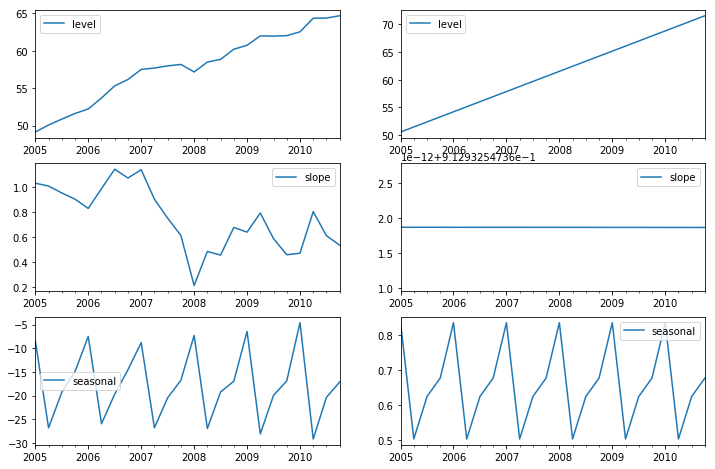

In [11]:
states1 = pd.DataFrame(np.c_[fit1.level, fit1.slope, fit1.season], columns=['level','slope','seasonal'], index=aust.index)
states2 = pd.DataFrame(np.c_[fit2.level, fit2.slope, fit2.season], columns=['level','slope','seasonal'], index=aust.index)
fig, [[ax1, ax4],[ax2, ax5], [ax3, ax6]] = plt.subplots(3, 2, figsize=(12,8))
states1[['level']].plot(ax=ax1)
states1[['slope']].plot(ax=ax2)
states1[['seasonal']].plot(ax=ax3)
states2[['level']].plot(ax=ax4)
states2[['slope']].plot(ax=ax5)
states2[['seasonal']].plot(ax=ax6)
plt.show()